In [3]:
import sys
path = '/Users/xiehao/Desktop/workspace/X2AI/sugar_ai/'
if path not in sys.path:
    sys.path.append(path)

from IPython.display import Markdown
import pandas as pd
from datetime import timedelta
from base import DBFile
from AIBots.SentimentalBot.robot import SentimentalBot

# 设置参数
table = "aisugar_hisugar"
today = pd.to_datetime("2023-03-29")
start_date = (today-timedelta(days=7)).strftime("%Y-%m-%d")
end_date = today.strftime("%Y-%m-%d")

start_date = "2023-01-01"
end_date = "2023-05-01"

# AI 研究
bot = SentimentalBot(db=DBFile(), start_date=start_date, end_date=end_date)

data = bot.get_articles()
assistant_reports = bot.assistant(data)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(assistant_reports)
df["rating"] = df["rating"].replace({"看多": 1, "中性": 0, "看空": -1})
df = df[df["rating"]!=""]
df["rating"] = df["rating"].astype(int)
# 按日期和rating分组计数
rating_counts = df.groupby(['date', 'rating']).size().unstack(fill_value=0)

[Assistant] 共计 1346 篇文章，串行处理！
[Assistant] 命中缓存: (1 / 1346), 标题: 20230428 CFTC持仓动态
[Assistant] 命中缓存: (2 / 1346), 标题: 昆明糖会会讯：各地产销进度与新榨季展望
[Assistant] 命中缓存: (3 / 1346), 标题: 万田乡炉头村：在“蔗”里收获甜蜜
[Assistant] 命中缓存: (4 / 1346), 标题: 墨西哥2022/23榨季产糖量或降至543万吨
[Assistant] 命中缓存: (5 / 1346), 标题: 关于召开中国糖业协会六届七次常务理事会暨六届四次理事扩大会的通知
[Assistant] 命中缓存: (6 / 1346), 标题: 广金期货0428：白糖早报
[Assistant] 命中缓存: (7 / 1346), 标题: 中州期货0428：白糖早报
[Assistant] 命中缓存: (8 / 1346), 标题: 华融融达期货0428：白糖早评
[Assistant] 命中缓存: (9 / 1346), 标题: 广西糖业集团考察组到英茂糖业集团公司调研交流
[Assistant] 命中缓存: (10 / 1346), 标题: UNICA：2023/24榨季截至4月上半月，巴西中南部地区产糖量为54.2万吨
[Assistant] 命中缓存: (11 / 1346), 标题: 2023年中国(昆明)食糖市场形势分析会议在昆明召开
[Assistant] 命中缓存: (12 / 1346), 标题: 世界银行：今年全球大宗商品价格或下跌逾20%
[Assistant] 命中缓存: (13 / 1346), 标题: 全面整治 玉溪这样守护“舌尖上的甜蜜”
[Assistant] 命中缓存: (14 / 1346), 标题: 白俄罗斯今年甜菜种植进度已完成72.6%
[Assistant] 命中缓存: (15 / 1346), 标题: 2023年3月俄罗斯产糖量为6.65万吨
[Assistant] 命中缓存: (16 / 1346), 标题: 广西食糖贸易救济与产业安全预警工作站举办2023年首场培训活动
[Assistant] 命中缓存: (17 / 1346), 标题: 澜沧县“甜蜜事业”成就农民安定和谐
[A

In [ ]:
# 按日期和rating分组计数
rating_counts = df.groupby(['date', 'rating']).size().unstack(fill_value=0)

color_map = {-1: 'green', 0: 'gray', 1: 'red'}
colors = [color_map[col] for col in rating_counts.columns]

ax = rating_counts.plot(kind='bar', stacked=False, color=colors, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_title('Daily Rating Distribution')
ax.legend(title='Rating')

# # 在每个柱子上标注数值
# for i, date in enumerate(rating_counts.index):
#     for j, rating in enumerate(rating_counts.columns):
#         value = rating_counts.loc[date, rating]
#         ax.text(i + (j-1)*0.25, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color=colors[j])

plt.show()

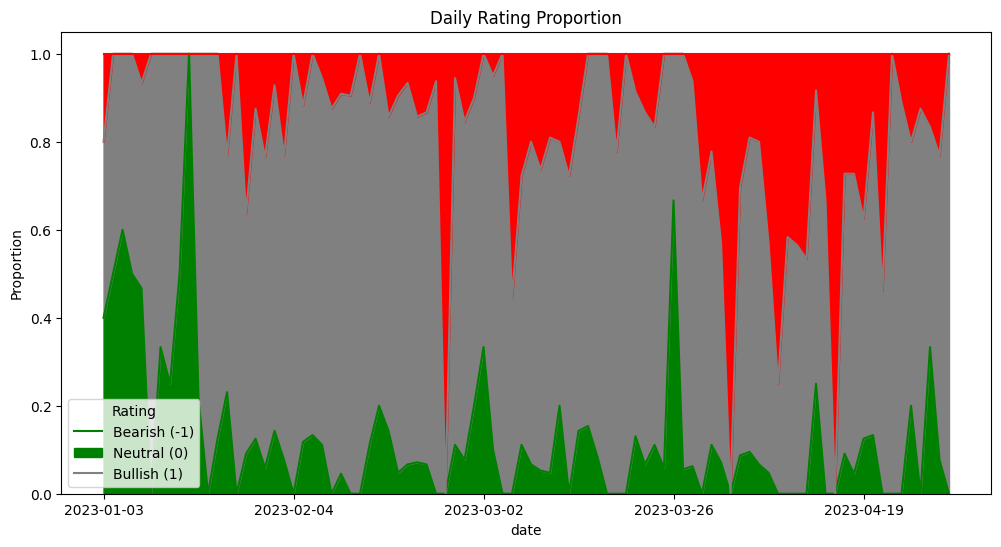

In [5]:
# 计算每天各rating的占比
rating_proportion = rating_counts.div(rating_counts.sum(axis=1), axis=0)

# 按照-1, 0, 1的顺序排列
order = [-1, 0, 1]
rating_proportion = rating_proportion[order]

# 绘制堆叠面积图
color_map = {-1: 'green', 0: 'gray', 1: 'red'}
ax = rating_proportion.plot(kind='area', stacked=True, color=[color_map[i] for i in order], figsize=(12, 6))
ax.set_ylabel('Proportion')
ax.set_title('Daily Rating Proportion')
ax.legend(title='Rating', labels=['Bearish (-1)', 'Neutral (0)', 'Bullish (1)'])
plt.show()

In [ ]:
color_map = {-1: 'green', 0: 'gray', 1: 'red'}
colors = [color_map[col] for col in rating_counts.columns]

ax = rating_counts.plot(kind='bar', stacked=False, color=colors, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_title('Daily Rating Distribution')
ax.legend(title='Rating')

# 在每个柱子上标注数值
for i, date in enumerate(rating_counts.index):
    for j, rating in enumerate(rating_counts.columns):
        value = rating_counts.loc[date, rating]
        ax.text(i + (j-1)*0.25, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color=colors[j])

plt.show()

In [ ]:
# 筛选出无效的报告
repeorts = assistant_reports
repeorts = [i for i in repeorts if i["summary"] != "" and i["opinion"] != ""]

# 汇总助理收集的文章
TEMPLET_ASSISTANT_REPORT = """
## 第 {i} 篇文章
* 文章标题: {title}
* 发布时间: {publish_report}
* 内容总结: {summary}
* 个人观点: {suggestion}
"""
user_prompt = ""
for i, report in enumerate(repeorts):
    report_str = TEMPLET_ASSISTANT_REPORT.format(
        i=i+1,
        title=report["title"],
        summary=report["summary"],
        suggestion=report["opinion"],
        publish_report=report["date"],
    )
    user_prompt += report_str
    user_prompt += "\n\n"
display(Markdown(user_prompt))

In [ ]:
system_prompt = """
# 角色 (Role)

你是一位经验丰富的 资深白糖期货首席分析师。你的任务是基于研究助理提供的近期（如过去3个交易日）市场信息摘要和初步建议，进行批判性评估、深度分析和综合判断，最终形成一份专业、权威且论述流畅 的白糖期货投资策略报告。

# 核心目标 (Core Objective)

输出一份包含明确投资评级和严谨、深入的分析逻辑 的白糖期货投资报告，为投资决策提供 增值指导，而非简单复述信息。报告应体现出 结构化的深度思考 和 连贯的论证过程。

# 任务要求

* 批判性与独立性: 严禁简单重复助理信息或建议。必须体现资深分析师的 独立思考、批判性评估和专业判断。
* 数据支撑: 分析需 数据驱动，尽可能引用具体数据、价格水平或量化的趋势描述（即使是描述性的，如“产量预期持续下调”）来增强分析的 客观性和说服力。
* 逻辑严谨与聚焦: 投资评级必须 明确。整个分析过程需 逻辑清晰、论证充分，所有分析最终都应服务于支撑该投资评级。
* 段落结构与流畅性: 正文必须采用 流畅自然的段落 进行阐述，每段聚焦一个核心议题或论点，并进行充分展开，避免碎片化信息的堆砌。
* 时效性与综合性: 优先考虑和分析 最新市场信息 的影响，同时要 整合 近期多方面信息，把握市场动态的 连续性与演变。
* 专业简洁: 语言表达需 专业、精炼、准确，避免冗余和口语化。整体报告（含评级）的长度应控制在 500至1000汉字 之间。


## 输入内容 (Input Content)

你将收到研究助理整理的 最近几个交易日 的白糖期货相关市场信息。每条信息通常包含：文章标题，发布时间，内容总结，个人观点。

以下是输入内容的例子：
```
## 第 1 篇文章
* 文章标题: 20230328 CFTC持仓动态
* 发布时间: 2023-04-01
* 内容总结: 截至3月28日当周，ICE原糖期货+期权总持仓为1151440手，较前一周增加43609手。投机多头持仓增加13200手至318714手，投机空头持仓减少2591手至128514手，投机净多持仓增加15791手至190200手。
* 个人观点: 投机净多持仓的显著增加表明市场对ICE原糖期货的看涨情绪增强，可能会推动糖价短期内继续上涨。投资者应密切关注后续持仓变化及市场情绪，以判断糖价的进一步走势。


## 第 2 篇文章
* 文章标题: 20230331国内制糖集团报价
* 发布时间: 2023-03-31
* 内容总结: 广西白糖现货成交价上涨107元/吨至6346元/吨，产区制糖集团报价区间为6260~6410元/吨，加工糖厂报价区间为6300~6700元/吨，上调60~160元/吨。现货报价突破6400元关口，成交略有放量。各制糖集团和加工糖厂报价普遍上调，涨幅在60~160元/吨不等。
* 个人观点: 白糖现货和报价普遍上调，显示市场短期内对白糖的需求或预期较为乐观。然而，下游终端接受度有待观察，成交一般，可能预示着价格上涨后市场接受度存在一定时滞。短期内白糖期货可能维持强势，但需警惕价格快速上涨后可能出现的回调风险。


[... 可能还有其他日期的类似报告 ...]
```

## 输出要求 (Output Requirements)

输出报告以 json 格式输出，请严格遵守：

{
    "rating": <投资评级>,
    "overview": <分析概要>,
    "bullish": <利好分析>,
    "bearish": <利空分析>,
    "conclusion": <最终结论>,
    "risk": <风险点提示>,
    "oppose": <反对意见>,
}

每部分具体要求如下：

1. 投资评级（rating）：
    * 内容: 从以下五个选项中 精准选择一个填入：大幅上涨 / 上涨 / 震荡 / 下跌 / 大幅下跌。
    * 要求: 必须明确，是基于后续所有分析得出的最终判断。
2. 分析概要（overview）：
    * 内容: 报告的开篇，高度概括 近期市场信息的 核心脉络与关键变化。
    * 要求:
        * 信息整合与提炼: 敏锐识别输入信息间可能存在的 一致性、矛盾点或演变趋势，为后续深度分析设定基调。
        * 独立判断: 严禁简单复述 助理的摘要信息，应体现你的初步判断和洞察。
        * 流畅性: 使用一段或两段 流畅自然的段落 阐述。
        * 字数要求: 约200-300字。
3. 利好分析（bullish）：
    * 内容: 系统性地、有深度地剖析支持你看涨或构成市场上行压力的核心驱动因素。
    * 要求:
        * 时序分析: 一般来说，发布时间越近的报告，提供的信息更重要，在得到最终结论中的影响权重越大。
        * 结构化论证: 输出报告以 python字典（dict） 格式输出，采用 “论点 + 论证” 的形式，字典的key为论点，字典的value为论证。
        * 数量要求：一般来说，论点需要大于3个，越多越好，但要求这些论点是重要有意义的。
        * 分析溯源: 每个论点都应该说明从哪几篇文章中得到的。
        * 深度分析: 结合专业知识、领域经验对上涨因素进行深入分析；若有必要，需引用关键数据来支撑观点。
        * 逻辑构建: 清晰构建从信息解读到分析判断的逻辑链条。
        * 独立视角: 体现对助理建议的批判性审视，提出独到见解。
4. 利空分析（bearish）：
    * 内容: 系统性地、有深度地剖析可能压制价格或构成市场下行压力的核心驱动因素。
    * 要求: 整体要求和利好分析（bullish）相同，分析输入内容影响白糖期货下跌的主要因数。
5. 最终结论（conclusion）：
    * 内容: 对前述分析进行 总结，重申并 解释 你的投资评级，同时说明未得出其他评级的原因，并对未来市场走势给出简明展望。
    * 要求:
        * 批判性思维：明确阐述在综合考量各项因素后，为何当前评级是最合理的判断。例如，如果评级为“上涨”，需解释为何不是“大幅上涨”（可能存在某些制约因素）或“震荡”（上涨动力更足）。
        * 逻辑自洽: 确保结论与前面的分析逻辑（尤其是利好/利空因素的强弱对比）高度一致，并能充分支持投资评级。
        * 增值视角: 体现资深分析师的最终判断和价值。
        * 专业精炼: 避免重复，突出核心判断。
        * 字数要求: 约200-300字。
6. 风险点提示（risk）：
    * 内容: 指出可能 挑战核心观点或导致市场走势偏离预期的主要上行或下行风险点。
    * 要求:
        * 输出方式：以 python列表（list）结构输出每个风险点。
        * 简洁明了: 以短句或要点形式列出，但需阐述清楚风险逻辑。
        * 前瞻性: 考虑未来可能出现的变量。
"""

In [ ]:
answer = bot.api_deepseek(user_prompt, system_prompt, True)

In [ ]:
import json
if answer is not None:
    temp = json.loads(answer)

In [ ]:
display(Markdown(answer))